## Install OpenCV
`pip install opencv-python`

# Basic OpenCV `照片是 矩陣+維度 所形成`

![alt text](images/lena.jpg)

## read/write image

In [7]:
import cv2 #opencv读取的格式是BGR
import matplotlib.pyplot as plt
import numpy as np

#把圖嵌在jupyter裡面，不是python語法，用ju才要加這句
%matplotlib inline 

                          #檔案位置         讀取方法
color_img=cv2.imread('./images/cat.jpg',cv2.IMREAD_COLOR) 
gray_img=cv2.imread('./images/cat.jpg',cv2.IMREAD_GRAYSCALE) 

In [7]:
color_img.shape  #.shape矩阵的长度 因為是彩色照片 所以有長寬+深度RGB

(414, 500, 3)

In [8]:
gray_img.shape # 灰階照片 只有長寬

(414, 500)

In [9]:
color_img.dtype  

dtype('uint8')

In [10]:
gray_img.dtype  # uint8=无符号整数（0 to 255）

dtype('uint8')

In [11]:
color_img       #照片裡面的像素長這樣

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

In [12]:
gray_img #0~255 代表不同程度

array([[153, 157, 162, ..., 174, 173, 172],
       [119, 124, 129, ..., 173, 172, 171],
       [120, 124, 130, ..., 172, 171, 170],
       ...,
       [187, 182, 167, ..., 202, 191, 170],
       [165, 172, 164, ..., 185, 141, 122],
       [179, 179, 146, ..., 197, 142, 141]], dtype=uint8)

In [8]:
# show image
cv2.imshow('image',color_img)  #(視窗標題,哪張照片)
# cv2.imshow('image',gray_img)

# waiting time(ms), 0 mean any stop key
cv2.waitKey(0) #寫0代表這張照片會一直開著，直到你任意按一鍵才關掉(寫3000就是開3秒)
cv2.destroyAllWindows()

In [9]:
cv2.imwrite('./images/mycat.png',color_img)   #寫檔 (要寫入哪,哪張圖)
cv2.imwrite('./images/mycat2.png',gray_img)

True

## 像素到底長怎樣? 一個[  ]寫的3個數字就是一顆像素 [B,G,R]

In [15]:
import numpy as np
import cv2
g_img = np.zeros((5,4,3), dtype=np.uint8)  #長5 寬4 深 3
g_img[:,:,1] = 255 #純綠色
cv2.imshow('g_img', g_img)

g_img

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]], dtype=uint8)

In [18]:
import numpy as np
import cv2
g_img = np.zeros((500,400), dtype=np.uint8)  #長500 寬400
g_img[:,:] = 0  #0是純黑 255純白
cv2.imshow('g_img', g_img)
cv2.waitKey(0) 
cv2.destroyAllWindows()
g_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## region of interest (ROI) 你感興趣的只有圖的一小角

In [10]:
import cv2
img=cv2.imread('./images/cat.jpg')
cv2.imshow('image',img) # .imshow(標題名稱,哪張圖)

cv2.waitKey(0) 
cv2.destroyAllWindows()

In [11]:
# 只框出你要的部分 
cat=img[0:50,0:200]  #左上是(0,0)  [x,y] 往下x 往右y
cv2.imshow('image',cat) 

cv2.waitKey(0) 
cv2.destroyAllWindows()

## split image channel  圖片分層

In [12]:
import cv2
img=cv2.imread('./images/cat.jpg')

#切開寫法一：
b = img[:,:,0] 
g = img[:,:,1]  #[全選,全選,index是固定] RGB的順序其實顯示是 依B G R 顯示
r = img[:,:,2]

#切開寫法二： 3張切開
# b, g, r = cv2.split(img) 

# cv2.imshow('origin',img)

cv2.imshow('b',b)
cv2.imshow('g',g) #每個單片 其實就是灰階照片
cv2.imshow('r',r)

#把 b設成 0 ：清掉 b 剩 r g
img[:,:,0] = 0
cv2.imshow('clean channel b to zero',img)  

#接上面 清掉 b又清 g 就剩 r
img[:,:,1] = 0
cv2.imshow('clean channel b & g to zero',img) 



cv2.waitKey(0) 
cv2.destroyAllWindows()

## merge image channel 圖片合併

In [20]:
import cv2
img=cv2.imread('./images/cat.jpg')

b, g, r = cv2.split(img)
bgr_img = cv2.merge([b,g,r])
rgb_img = cv2.merge([r,g,b])  #沒照BGR順序 照片會怪怪

cv2.imshow('bgr image',bgr_img)
cv2.imshow('rgb image',rgb_img)

cv2.waitKey(0) 
cv2.destroyAllWindows()

## Generate images 建立圖片

In [7]:
import numpy as np
import cv2

b_img = np.zeros((300,300,3), dtype=np.uint8) #(長.寬.深度)是彩色 所以深度3  建立一個300*300*3全為0的陣列
b_img[:,:,0] = 255  #b的255=純藍色 
cv2.imshow('b_img', b_img)

g_img = np.zeros((300,300,3), dtype=np.uint8)
g_img[:,:,1] = 255 #純綠色
cv2.imshow('g_img', g_img)

r_img = np.zeros((300,300,3), dtype=np.uint8)
r_img[:,:,2] = 255  #純紅色
cv2.imshow('r_img', r_img)

random_img =  np.random.randint(0,256, size=[300,300], dtype=np.uint8)  # random是灰階 所以沒有深度  (0-256就是0-255 255不算)
cv2.imshow('random_img', random_img) 

cv2.waitKey(0) 
cv2.destroyAllWindows()

## Boundary Padding  邊界填充
- BORDER_REPLICATE：复制法，也就是复制"最边缘"像素。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在"两边"进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以"最边缘"像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

In [7]:
import numpy as np
import cv2

img=cv2.imread('./images/cat.jpg')

#設定好上下左右 要各加多少像素
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=(0,255,0))
                                                                                          # value=0 是顏色， BGR
cv2.imshow('replicate', replicate)
cv2.imshow('reflect', reflect)
cv2.imshow('reflect101', reflect101)
cv2.imshow('wrap', wrap)
cv2.imshow('constant', constant)

cv2.waitKey(0) 
cv2.destroyAllWindows()

## Image Operation(ADD)  圖片相加 可指定加多少數值

In [3]:
import cv2
import numpy as np

# np.random.randint公式(low, high=None, size=None, dtype='l')
img1 = np.random.randint(0, 256, size=[3,3], dtype=np.uint8)
img2 = np.random.randint(0, 256, size=[3,3], dtype=np.uint8)

print(img1)
print(img2)
print(img1+img2)  #這種方法 超過255的部分 會變成a+b-256 ，建議用下一格寫法

[[186 250 150]
 [172 195 254]
 [170 203 154]]
[[122 237 162]
 [111 159  29]
 [ 99 130 144]]
[[ 52 231  56]
 [ 27  98  27]
 [ 13  77  42]]


In [14]:
import cv2
import numpy as np

img1 = np.random.randint(0, 256, size=[3,3], dtype=np.uint8)
img2 = np.random.randint(0, 256, size=[3,3], dtype=np.uint8)

print(img1)
print(img2)
print(cv2.add(img1,img2))  #這種方法 超過255的部分 就訂為255

[[106 169   1]
 [ 42 234 159]
 [124  31   1]]
[[ 11 148 247]
 [255 121  82]
 [130 210 214]]
[[117 255 248]
 [255 255 241]
 [254 241 215]]


In [8]:
import cv2

img1=cv2.imread('./images/cat.jpg',cv2.IMREAD_COLOR)
img2=cv2.imread('./images/cat.jpg',cv2.IMREAD_COLOR)

cv2.imshow('img1+img2', img1+img2)
cv2.imshow('cv2.add(img1, img2)', cv2.add(img1,img2)) #這種方法雖不超過255 但兩張圖片直接相加有點太多

cv2.waitKey(0) 
cv2.destroyAllWindows()

In [1]:
import cv2

img1=cv2.imread('./images/cat.jpg',cv2.IMREAD_COLOR)

cv2.imshow('img1', img1)
cv2.imshow('img1+50', cv2.add(img1,50))  #只加 50

cv2.waitKey(0) 
cv2.destroyAllWindows()

## Image Operation(ADD Weighted)  加權平均
## 合併兩張圖 誰要比較明顯

In [7]:
import cv2

img1=cv2.imread('./images/cat.jpg',cv2.IMREAD_COLOR)
img2=cv2.imread('./images/lena.jpg',cv2.IMREAD_COLOR)

img1 = cv2.resize(img1, (250, 250)) #改變尺寸 讓兩張大小變一樣
img2 = cv2.resize(img2, (250, 250)) # .resize(哪張照片,(長,寬))

# 分配權重 誰要比較明顯 img1*0.4權重 + img2*0.6權重 + 0
result = cv2.addWeighted(img1, 0.4, img2, 0.6, 0)

cv2.imshow('weighted image', result)

cv2.waitKey(0) 
cv2.destroyAllWindows()

## Image Operation(Bitwise Operation) 視為二進位處理
#### 舉例：二進位  011 .101 兩個數來做比較
####  and 兩個都有1 才是1 : 001
####  or   一個有1就是1 : 111
A AND B 只有在兩者皆為 1 的時候才會 1，A OR B 則是兩者有ㄧ者為1的時候就會1，而A XOR B 是 A 與 B 不相等的時候為 1，NOT 則是單純地 0 變  1、1 變 0。

In [7]:
import cv2
import numpy as np

img1 = cv2.imread('./images/lena.jpg')
img2 = np.zeros(img1.shape, dtype=np.uint8)
img2[100:400, 200:400]=255  #中間部分設為純白色
img2[100:500, 100:200]=255

# cv2.imshow('img1', img1)
# cv2.imshow('img2', img2)


and_result = cv2.bitwise_and(img1, img2) # lena跟白色 都有的部分
or_result = cv2.bitwise_or(img1, img2) #lena 有或白有的部分 所以實際是lena+白重疊
xor_result = cv2.bitwise_xor(img1, img2) #兩個不同 就1
not_result = cv2.bitwise_not(img1) #把lena的值反轉
cv2.imshow('and result', and_result)
cv2.imshow('or result', or_result)
cv2.imshow('xor result', xor_result)
cv2.imshow('not result', not_result)


cv2.waitKey(0) 
cv2.destroyAllWindows()

## Image Operation(Encrypt image) 早期 影像加密方法

In [8]:
import cv2
import numpy as np

img1 = cv2.imread('./images/lena.jpg')
key = np.random.randint(0,256,size=img1.shape, dtype=np.uint8)  # 所以key是隨機的東西

encryption = cv2.bitwise_xor(img1, key)  #加密 把照片跟key做xor
decryption = cv2.bitwise_xor(encryption, key)  #解密 用已xor的再跟key做xor

cv2.imshow('img1', img1)
cv2.imshow('key', key)
cv2.imshow('encryption', encryption)
cv2.imshow('decryption', decryption)


cv2.waitKey(0) 
cv2.destroyAllWindows()

# Color Space

## Grayscale

In [1]:
import cv2 #opencv讀取格式是BGR
import numpy as np

img=cv2.imread('./images/lena.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)   # COLOR_BGR2GRAY 把BGR轉換成GRAY
cv2.imshow('gray image', img_gray)

cv2.waitKey(0) 
cv2.destroyAllWindows()

## HSV  
- H - 色調(主波長) 
- S - 飽和度
- V - 強度

In [9]:
import cv2
import numpy as np

img=cv2.imread('./images/lena.jpg')
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow('HSV image', img_hsv)

cv2.waitKey(0) 
cv2.destroyAllWindows()

## Threshold   /ˈθreʃ.hoʊld/ 門檻
### 變成二元照片(只有黑or白)

#### 公式 ret, dst输出图 = cv2.threshold(src输入图, thresh阈值, maxval最大值, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- thresh： 阈值
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
#### type：二值化操作的类型，包含以下5种类型：
- cv2.THRESH_BINARY           ：超过門檻部分取maxval（最大值），否则取0
- cv2.THRESH_BINARY_INV    ：THRESH_BINARY的反转
- cv2.THRESH_TRUNC            ：大於門檻部分设为阈值，否则不变
- cv2.THRESH_TOZERO          ：大於門檻部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  ：THRESH_TOZERO的反转

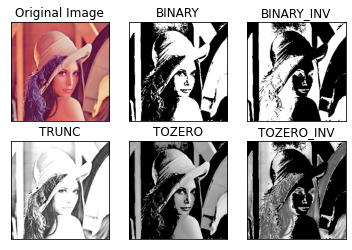

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img=cv2.imread('./images/lena.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #要先轉成灰階

ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)  # THRESH_BINARY 像素超過127就會設成255 ，沒超過的就設0
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

# COLOR_BGR2RGB (openCV 都是讀BGR ，但matplotlib是讀RGB 所以要轉換)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1) #順序位置 (列,行,第幾張)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i]) #秀出 每張圖片頭上的標題
    plt.xticks([]), plt.yticks([]) #把x.y軸標籤都用成空白
plt.show()

# Drawing 畫畫 (線.方框.圈.多邊形)
#### 座標看法 左上角(0,0) 往右是x 往下是y

In [26]:
import numpy as np
import cv2

# 建立一張 512x512 的 RGB 圖片（黑色，因為裡面全是0）
img = np.zeros((256, 256, 3), np.uint8)

# 將圖片用淺灰色 (200, 200, 200)填滿 
img.fill(200) # .fill填滿 200是灰色 

# 在圖片上畫一條紅色的對角線，寬度為 5 px
        # 座標  起始      結束     顏色 B G R  粗度
cv2.line(img, (0, 0), (255, 255), (0, 0, 255), 5)

# 顯示圖片
cv2.imshow('My Image', img)

# 按下任意鍵則關閉所有視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
import numpy as np
import cv2

img = np.zeros((256, 256, 3), np.uint8)
img.fill(200)

# 在圖片上畫一個綠色方框，線條寬度為 2 px
cv2.rectangle(img, (20, 60), (120, 160), (0, 255, 0), 2)

# 綠色實心方框
cv2.rectangle(img, (40, 80), (100, 140), (0, 255, 0), -1) # -1實心
cv2.imshow('My Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
import numpy as np
import cv2

img = np.zeros((256, 256, 3), np.uint8)
img.fill(200)

cv2.line(img, (0, 0), (255, 255), (0, 0, 255), 5)
cv2.rectangle(img, (20, 60), (120, 160), (0, 255, 0), 2)
cv2.rectangle(img, (40, 80), (100, 140), (0, 255, 0), -1)

# 黃色圓圈，線條寬度為 3 px
#               座標點    半徑   顏色       粗度
cv2.circle(img,(90, 210), 30, (0, 255, 255), 3)

# 藍色實心圓圈
cv2.circle(img,(140, 170), 15, (255, 0, 0), -1)

cv2.imshow('My Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
import numpy as np
import cv2

img = np.zeros((256, 256, 3), np.uint8)
img.fill(200)

# 設定多邊形頂點座標
pts = np.array([[170, 55], [165, 75], [220, 80], [200, 60]], np.int32)
#可以看出這是一個4*2=8的矩陣 
print("原本的",pts.shape)


# 將座標轉為 (頂點數量, 1, 2) 的陣列
pts = pts.reshape((-1, 1, 2)) # reshape 的-1 是讓numpy自己算的意思
# x*1*2=8 所以x=4 也就是-1=4
print("reshape之後的",pts.shape)


# 繪製多邊形            連線成一圈   顏色      粗度
cv2.polylines(img, [pts], True, (255, 255, 0), 4)

cv2.imshow('My Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

原本的 (4, 2)
reshape之後的 (4, 1, 2)


# 文字字型
### cv2.putText(影像, 輸出文字, 文字座標, 字型, 字元大小, 文字顏色, 線條寬度, 線條種類)
- FONT_HERSHEY_SIMPLEX：正常大小無襯線字體、
- FONT_HERSHEY_PLAIN：小號無襯線字體、
- FONT_HERSHEY_DUPLEX：正常大小無襯線字體，比FONT_HERSHEY_SIMPLEX複雜一點、
- FONT_HERSHEY_COMPLEX：正常大小有襯線字體、
- FONT_HERSHEY_TRIPLEX：正常大小有襯線字體，比FONT_HERSHEY_COMPLEX複雜一點、
- FONT_HERSHEY_COMPLEX_SMALL：FONT_HERSHEY_COMPLEX的小號、
- FONT_HERSHEY_SCRIPT_SIMPLEX：手寫風格細體、
- FONT_HERSHEY_SCRIPT_COMPLEX：手寫風格粗體

In [39]:
import numpy as np
import cv2

img = np.zeros((400, 400, 3), np.uint8) #圖片大小
img.fill(90) #用深灰填滿

# 文字
text = 'Hello, OpenCV!'

# 使用各種字體  
#                        座標               字型          大小   顏色BGR    粗度   線條種類
cv2.putText(img, text, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5, cv2.LINE_AA)

cv2.putText(img, text, (10, 80), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 120), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 160), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 200), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 240), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 280), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 320), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.imshow('My Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# mouse event 滑鼠畫畫
- cv2.EVENT_MOUSEMOVE	滑鼠移動
- cv2.EVENT_LBUTTONDOWN	左鍵點選
- cv2.EVENT_RBUTTONDOWN	右鍵點選
- cv2.EVENT_MBUTTONDOWN	中間點選
- cv2.EVENT_LBUTTONUP 左鍵釋放
- cv2.EVENT_RBUTTONUP	右鍵釋放
- cv2.EVENT_MBUTTONUP	中間釋放
- cv2.EVENT_LBUTTONDBLCLK	左鍵雙擊
- cv2.EVENT_RBUTTONDBLCLK	右鍵雙擊
- cv2.EVENT_MBUTTONDBLCLK	中間雙擊


In [1]:
import numpy as np
import cv2 as cv
# 滑鼠回撥函式
def draw_circle(event,x,y,flags,param): #draw_circle 是畫圖，不是只畫圓
    if event == cv.EVENT_LBUTTONDBLCLK:     #點兩下繪畫圓
        cv.circle(img,(x,y),100,(255,0,0),-1) # 顏色BGR -1實心
        
# 建立一個黑色的影象，一個視窗，並繫結到視窗的功能
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):   #無限迴圈
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:       #按ESC 觸發離開的意思
        break
cv.destroyAllWindows()

In [2]:
import numpy as np
import cv2 as cv
drawing = False # 如果按下滑鼠，則為真
mode = True # 如果為真，繪製矩形。按 m 鍵可以切換到曲線
ix,iy = -1,-1
# 滑鼠回撥函式
def draw_circle(event,x,y,flags,param):   # draw_circle 是畫圖的意思
    global ix,iy,drawing,mode  #全域變數
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1) #長方形
            else:
                cv.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),5,(0,0,255),-1)
            
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

In [12]:
import cv2
img= cv2.imread('./images/cat.jpg')          #定義圖片位置
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #轉化為灰度圖

def onmouse(event, x, y, flags, param):   #標準滑鼠互動函式
    if event==cv2.EVENT_MOUSEMOVE:      #當滑鼠移動時
        print("x:{}, y:{}".format(x, y))   #顯示滑鼠所在畫素的座標，注意畫素表示方法和座標位置的不同

cv2.namedWindow("img")          #構建視窗
cv2.setMouseCallback("img", onmouse)   #回撥繫結視窗

while True:              
    cv2.imshow("img",img)        #顯示影象
    if cv2.waitKey() == ord('q'):
        break  #按下‘q'鍵，退出

cv2.destroyAllWindows()   

x:498, y:226
x:488, y:226
x:476, y:226
x:464, y:226
x:452, y:226
x:441, y:226
x:431, y:226
x:423, y:226
x:415, y:226
x:409, y:226
x:404, y:226
x:400, y:226
x:397, y:226
x:394, y:226
x:392, y:226
x:391, y:226
x:390, y:226
x:389, y:226
x:388, y:226
x:387, y:226
x:386, y:226
x:386, y:226
x:385, y:226
x:385, y:226
x:384, y:226
x:383, y:227
x:383, y:227
x:382, y:227
x:381, y:227
x:380, y:227
x:379, y:227
x:379, y:227
x:380, y:227
x:382, y:227
x:384, y:228
x:391, y:228
x:405, y:229
x:426, y:231
x:453, y:233
x:484, y:236
x:495, y:349
x:482, y:340
x:464, y:329
x:442, y:317
x:418, y:302
x:392, y:289
x:369, y:278
x:346, y:268
x:329, y:261
x:314, y:255
x:303, y:252
x:295, y:248
x:289, y:247
x:287, y:247
x:287, y:247
x:288, y:247
x:289, y:247
x:290, y:247
x:293, y:247
x:297, y:247
x:300, y:247
x:306, y:248
x:315, y:250
x:327, y:254
x:341, y:258
x:358, y:263
x:377, y:269
x:402, y:277
x:432, y:287
x:465, y:297
x:481, y:321
x:455, y:306
x:428, y:291
x:402, y:276
x:380, y:262
x:361, y:251
x:350, y:243